In [2]:
import numpy as np
import torch
import h5py
from esn_fun import ReadParallelSeedStudy, ReadESNParams, CreateStudyConfigArray
from esn_params import ESNParams

filepath  = '/home/flhe/Documents/hdf5/Lorenz63_esn.hdf5'
esn_params = ReadESNParams(filepath)

Reading ESNParams.


## Import one seed

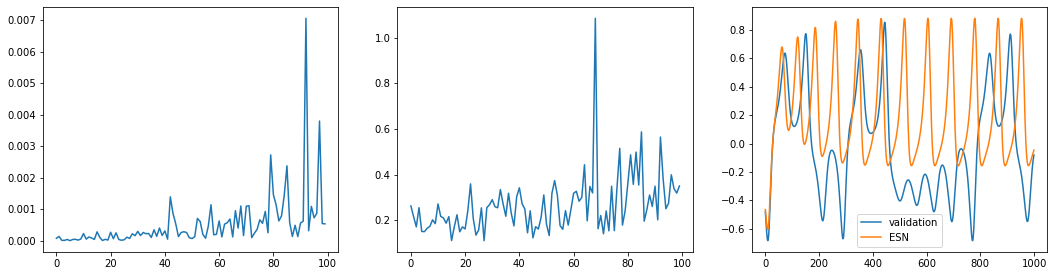

In [22]:
import matplotlib.pyplot as plt 

SeedID = 0
nstudy = 100
study_parameters = ['n_reservoir', 'reservoirDensity']
mse_train, mse_test, y_pred, study_dicts = ReadParallelSeedStudy(filepath, SeedID, study_parameters, nstudy)

y_pred = np.array(y_pred)
config = CreateStudyConfigArray(study_parameters,study_dicts) 

fig, axs  =plt.subplots(figsize = (18,4.5), ncols = 3)

istudy, imode  = (0,0)
axs[0].plot(range(nstudy), mse_train)
axs[1].plot(range(nstudy), mse_test)
axs[2].plot(range(esn_params.testingLength),esn_params.y_test[:,imode] ,label = 'validation')
axs[2].plot(range(esn_params.testingLength),y_pred[istudy,:,imode] ,label = 'ESN')

axs[2].legend()


## Import all seeds

In [14]:
import matplotlib.pyplot as plt 

nseeds = 20
nstudy = 100
study_parameters = ['n_reservoir', 'reservoirDensity']

mse_train_seeds, mse_test_seeds, y_pred_seeds = [], [], []

for SeedID in range(nseeds):
    mse_train, mse_test, y_pred, study_dicts = ReadParallelSeedStudy(filepath, SeedID, study_parameters, nstudy)
    mse_train_seeds.append(mse_train)
    mse_test_seeds.append(mse_test)
    y_pred_seeds.append(y_pred)
    

mse_train_seeds = np.array(mse_train_seeds)
mse_test_seeds = np.array(mse_test_seeds)
y_pred_seeds = np.array(y_pred_seeds)

mse_train_median  = np.median(mse_train_seeds, axis = 0)
mse_test_median  = np.median(mse_test_seeds, axis = 0)

config = CreateStudyConfigArray(study_parameters,study_dicts) 

fig, axs  =plt.subplots(figsize = (18,4.5), ncols = 3)

istudy, imode  = (0,0)
axs[0].plot(range(nstudy), mse_train_median)
axs[1].plot(range(nstudy), mse_test_median)
axs[2].plot(range(esn_params.testingLength),esn_params.y_test[:,imode] ,label = 'validation')
axs[2].plot(range(esn_params.testingLength),y_pred[istudy,:,imode] ,label = 'ESN')

axs[2].legend()


(100, 1000, 3)

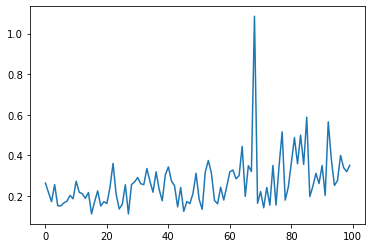